# TOPIC: EX 6.5: Unsupervised Machine Learning Clustering Using the World Sustainability Dataset

### Task Contents

#### 1. Importing libraries and data and renaming columns
#### 2. Standadizing the data
#### 3. The elbow technique
#### 4. k-means clustering

- Quetions to answer

- Install and import all necessary libraries in your Jupyter notebook.


- Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.


- Use the elbow technique as shown in the Jupyter notebook for this Exercise.
Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.
If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.


- Run the k-means algorithm.


- Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.


- Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.


- Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.


- Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
Propose what these results could be useful for in future steps of an analytics pipeline.


Save your notebook and submit it for your tutor to review.


### 1. Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating a path for this project

file_path = r"D:\career Foundary\Data_immersion\6_self data\World Sustainability Dataset project"

In [4]:
# loading the required data data

WorldSustainabilityDataset_N=pd.read_csv(os.path.join(file_path, '02 Data', 'Prepared data', 'WorldSustainabilityDataset_N.csv'), index_col = False)

In [5]:
WorldSustainabilityDataset_N.head()

,Unnamed: 0,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


### 2. Data Cleaning

In [6]:
# Drop the redundant columns

WorldSustainabilityDataset_NE = WorldSustainabilityDataset_N.drop(['Unnamed: 0'],axis = 1)

In [7]:
WorldSustainabilityDataset_NE.head(2)

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean


In [8]:
# Dropped the columns not needed for the analysis to answer our proposed questions and a subset

WorldSustainabilityDataset_NEW = WorldSustainabilityDataset_NE[["Country Name", "Year", "Gini index (World Bank estimate) - SI.POV.GINI", "Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS", "Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1", "Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1", "World Regions (UN SDG Definition)", "Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes", "Children out of school (% of primary school age) - SE.PRM.UNER.ZS" ]]

In [9]:
# Rename the subset columns whose names are too long for clearity and readability

WorldSustainabilityDataset_NEW.rename(columns = {'Gini index (World Bank estimate) - SI.POV.GINI' : 'Gini index', 'Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS': '% total Pr.Edu completion rate', 
                     'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1': '% pop.below poverty line', 'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1': 'Pop. with basic drinking water',
                     'World Regions (UN SDG Definition)': 'World Regions', 'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes' : 'CO2 emissions (M.tonnes)', 'Children out of school (% of primary school age) - SE.PRM.UNER.ZS' : '% of pri.school age Children out of sch.' },
                      inplace = True)

C:\Users\paulg\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
# Select only the necessary columns and put them in a list called columns

columns = ["Year",
           "Country Name",
           '% pop.below poverty line',
           "CO2 emissions (M.tonnes)"]

In [27]:
# created a new data frame for the the selected columns
df_N = WorldSustainabilityDataset_NEW[columns]
df_N.head(5)

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes)
0,2000,Aruba,NaN,2.378
1,2001,Aruba,NaN,2.407
2,2002,Aruba,NaN,2.437
3,2003,Aruba,NaN,2.561
4,2004,Aruba,NaN,2.616


In [29]:
#I want drop all rows of ""% pop.below poverty line" where value is NAN.

df_NE = df_N[df_N["% pop.below poverty line"].notna()]
df_NE

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes)
19,2000,Angola,36.4,9.515
27,2008,Angola,34.4,25.486
37,2018,Angola,49.9,37.679
40,2002,Albania,1.6,3.748
43,2005,Albania,0.9,4.199
...,...,...,...,...
3255,2006,Zambia,62.1,2.232
3259,2010,Zambia,65.8,2.563
3264,2015,Zambia,58.7,4.296
3279,2011,Zimbabwe,21.4,9.480


In [31]:
#created a frequency countof the countries

country_counts = df_NE["Country Name"].value_counts()
country_counts

Moldova                     19
Panama                      19
United States               19
Georgia                     19
Kyrgyz Republic             19
                            ..
Central African Republic     1
Syrian Arab Republic         1
Vanuatu                      1
Lebanon                      1
Haiti                        1
Name: Country Name, Length: 148, dtype: int64

In [32]:
# convert dataset whereby it becomes a list and only countries whose NAN values are greater 13

keep_countries = list(country_counts[country_counts >= 13].index)
print (keep_countries)

['Moldova', 'Panama', 'United States', 'Georgia', 'Kyrgyz Republic', 'Indonesia', 'Costa Rica', 'Russian Federation', 'Peru', 'Belarus', 'Dominican Republic', 'Uruguay', 'El Salvador', 'Armenia', 'Honduras', 'Argentina', 'United Kingdom', 'Paraguay', 'Kazakhstan', 'Belgium', 'Germany', 'Bolivia', 'Ecuador', 'Turkey', 'France', 'Spain', 'Sweden', 'Luxembourg', 'Finland', 'Norway', 'Brazil', 'Austria', 'Greece', 'Ukraine', 'Ireland', 'Colombia', 'Denmark', 'Czech Republic', 'Thailand', 'Portugal', 'Estonia', 'Italy', 'Switzerland', 'Poland', 'Netherlands', 'Latvia', 'Cyprus', 'Slovenia', 'Lithuania', 'Iceland', 'Hungary', 'Slovak Republic', 'Bulgaria', 'Malta', 'Romania']


In [33]:
filtered_df_2 = df_N[df_N["Country Name"].isin(keep_countries)]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


filtered_df_2

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes)
76,2000,Argentina,6.8,142.358
77,2001,Argentina,10.7,134.004
78,2002,Argentina,16.9,124.392
79,2003,Argentina,7.9,134.631
80,2004,Argentina,5.7,157.043
81,2005,Argentina,4.2,161.434
82,2006,Argentina,3.3,174.609
83,2007,Argentina,2.6,174.246
84,2008,Argentina,2.5,188.106
85,2009,Argentina,2.3,178.949


In [34]:
filtered_df_2.shape

(1045, 4)

In [35]:
Grouped_data = filtered_df_2.groupby('Country Name')
Grouped_data

In [36]:
filtered_df_2['% poverty line'] = Grouped_data['% pop.below poverty line'].fillna(Grouped_data['% pop.below poverty line'].transform('mean'))

<ipython-input-36-c320bdb018db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['% poverty line'] = Grouped_data['% pop.below poverty line'].fillna(Grouped_data['% pop.below poverty line'].transform('mean'))


In [37]:
filtered_df_2

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes),% poverty line
76,2000,Argentina,6.8,142.358,6.800000
77,2001,Argentina,10.7,134.004,10.700000
78,2002,Argentina,16.9,124.392,16.900000
79,2003,Argentina,7.9,134.631,7.900000
80,2004,Argentina,5.7,157.043,5.700000
81,2005,Argentina,4.2,161.434,4.200000
82,2006,Argentina,3.3,174.609,3.300000
83,2007,Argentina,2.6,174.246,2.600000
84,2008,Argentina,2.5,188.106,2.500000
85,2009,Argentina,2.3,178.949,2.300000


In [38]:
filtered_df_2.shape


(1045, 5)

In [39]:
# Checked for missing values

filtered_df_2.isnull().sum()

Year                          0
Country Name                  0
% pop.below poverty line    116
CO2 emissions (M.tonnes)      0
% poverty line                0
dtype: int64

In [40]:
# drop the column for "% pop.below poverty line" because we have filled the NAN values

Emission_by_countries = filtered_df_2.drop(['% pop.below poverty line','Country Name'],axis = 1)
Emission_by_countries.head()

,Year,CO2 emissions (M.tonnes),% poverty line
76,2000,142.358,6.8
77,2001,134.004,10.7
78,2002,124.392,16.9
79,2003,134.631,7.9
80,2004,157.043,5.7


In [41]:
# Checking data types for consistencies

for col in Emission_by_countries.columns.tolist():
    Different_data_types = (Emission_by_countries[[col]].applymap(type) != Emission_by_countries[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (Emission_by_countries[ Different_data_types]) > 0:
        print (col, ' MIXED')
    else: print(col, ' CONSISTENT')

Year  CONSISTENT
CO2 emissions (M.tonnes)  CONSISTENT
% poverty line  CONSISTENT


In [ ]:
# i Exported my dataframe as a csv and store it correctly in your “Prepared Data” folder for further use.

In [ ]:
# Emission_by_countries.to_csv(os.path.join(file_path, '02 Data','Prepared Data', 'WorldSustainabilityDataset_subset.csv'))

In [ ]:
#Emission_by_countries['Year'] = Emission_by_countries['Year'].apply(1nt)

In [42]:
# Recalling 

Emission_by_countries.head()

,Year,CO2 emissions (M.tonnes),% poverty line
76,2000,142.358,6.8
77,2001,134.004,10.7
78,2002,124.392,16.9
79,2003,134.631,7.9
80,2004,157.043,5.7


In [43]:
Emission_by_countries.dtypes

Year                          int64
CO2 emissions (M.tonnes)    float64
% poverty line              float64
dtype: object

In [44]:
Emission_by_countries.isnull().sum()

Year                        0
CO2 emissions (M.tonnes)    0
% poverty line              0
dtype: int64

In [45]:
Emission_by_countries.shape

(1045, 3)

### 2b. Standadizing the data

In [ ]:
X = Emission_by_countries[['CO2 emissions (M.tonnes)', '% poverty line']]
Years = Emission_by_countries['Year']

print(X.isna().sum())

In [ ]:
# standazing the data first to avoid bias in the outcome

scaler = StandardScaler()

standardized_data = scaler.fit_transform(X)

print(standardized_data)

In [ ]:
Emission_by_countries = pd.DataFrame(standardized_data, columns=['CO2 emissions (M.tonnes)', '% poverty line'])
Emission_by_countries['Year'] = Year

### 3. Elbow technique

In [46]:
 # Defines the range of potential clusters in the data.
    
num_cl = range(1, 20)

# Defines k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [47]:
# Creates a score that represents 

score = [kmeans[i].fit(Emission_by_countries).score(Emission_by_countries) for i in range(len(kmeans))] 

# a rate of variation for the given cluster option.

score

C:\Users\paulg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[-651489738.1651518,
 -71360027.16672663,
 -26361919.022865932,
 -9260042.247885795,
 -5240667.393952103,
 -3743042.526211121,
 -2220283.842487162,
 -1370530.2638283751,
 -1021308.8816271949,
 -837457.6771780506,
 -677725.4840931902,
 -561237.5796325164,
 -486196.9771417905,
 -432750.65537154634,
 -369137.47841455194,
 -328095.3330821091,
 -292402.96787684655,
 -259367.1660794988,
 -230739.31822005668]

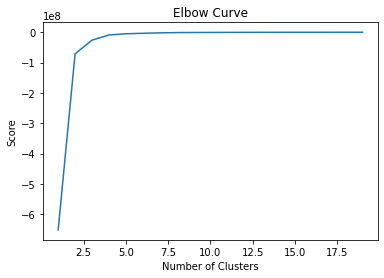

In [48]:
# i then plotted the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The is a noticable straighten line on the x-axis after 6. Therefore, the optimal count for your clusters is 6.

As we can notice, we are getting a value of between 3 and 4 for the breaking point of the curve, meaning that we are going to have to use one of those values. I am going with 3 clusters in this case, as the DF has few data, and the numerical variation even though not huge, is quite substancial do create up 3  clusters.

### 4 & 5. k-means clustering

In [55]:
# Now I created the object based on the n° of clusters

kmeans = KMeans(n_clusters = 3) 

In [56]:
# Then fit the k-means object to the data frame.
# Convert the list to a pandas DataFrame

df = pd.DataFrame(Emission_by_countries)



In [57]:
kmeans.fit(df)

KMeans(n_clusters=3)

### 6. Attaching to the DF

In [58]:
df['clusters'] = kmeans.fit_predict(df)

In [59]:
df.head()

,Year,CO2 emissions (M.tonnes),% poverty line,clusters
76,2000,142.358,6.8,0
77,2001,134.004,10.7,0
78,2002,124.392,16.9,0
79,2003,134.631,7.9,0
80,2004,157.043,5.7,0


In [60]:
df['clusters'].value_counts()

0    988
2     38
1     19
Name: clusters, dtype: int64

In [61]:
df.columns

Index(['Year', 'CO2 emissions (M.tonnes)', '% poverty line', 'clusters'], dtype='object')

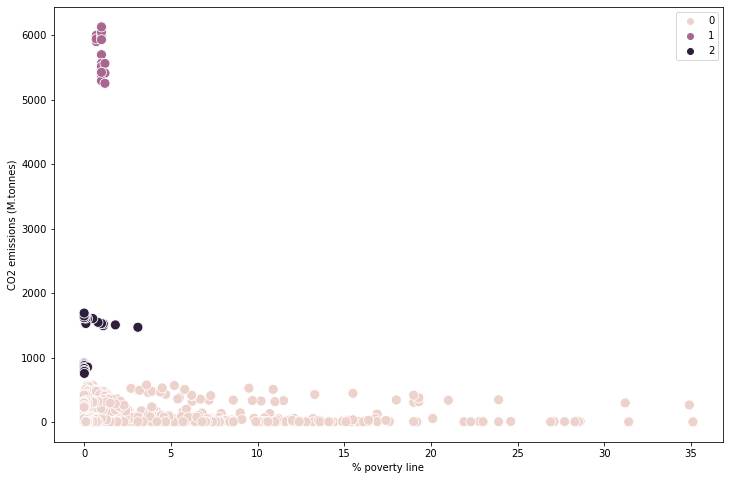

In [62]:
# Plot the clusters for the "CO2 emissions (M.tonnes)" and "% poverty line" variables.


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['% poverty line'], y=df['CO2 emissions (M.tonnes)'], hue=kmeans.labels_, s=100) 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

# This removes the grid from the background.

ax.grid(False) 
plt.xlabel('% poverty line') # Label x-axis.
plt.ylabel('CO2 emissions (M.tonnes)') # Label y-axis.
plt.show()

In [63]:
df.columns

Index(['Year', 'CO2 emissions (M.tonnes)', '% poverty line', 'clusters'], dtype='object')

In [64]:
df.head(20)

,Year,CO2 emissions (M.tonnes),% poverty line,clusters
76,2000,142.358,6.800000,0
77,2001,134.004,10.700000,0
78,2002,124.392,16.900000,0
79,2003,134.631,7.900000,0
80,2004,157.043,5.700000,0
81,2005,161.434,4.200000,0
82,2006,174.609,3.300000,0
83,2007,174.246,2.600000,0
84,2008,188.106,2.500000,0
85,2009,178.949,2.300000,0


### 7. visualizations 

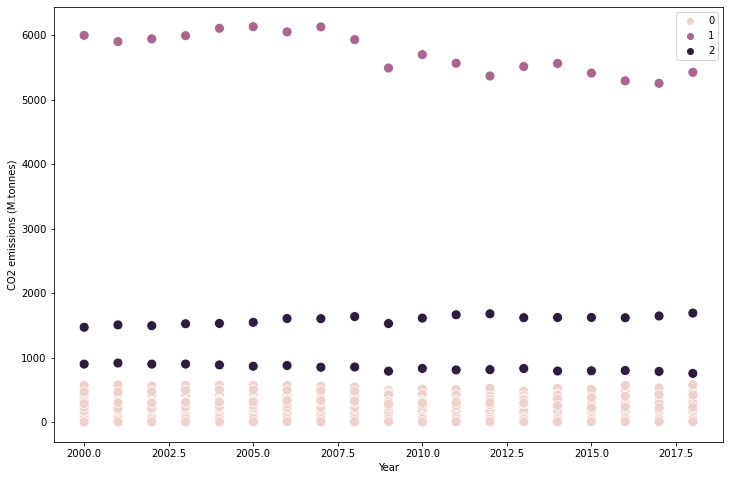

In [65]:
# Plot the clusters for the "CO2 emissions (M.tonnes)" and "% poverty line" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['CO2 emissions (M.tonnes)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('CO2 emissions (M.tonnes)') 
plt.show()

#### 8. The two graphs does not entirely makes sense or give a great insight to the relationship between the "CO2 emissions (M.tonnes)" and "% poverty line" of each of each country. This  suggested that there are other factors that are inclusively or not that would all together be used to determine what pushes the leve of prodution CO2 of a country up or down and how it affect the overall population of that country.

#### 9.  Descriptive statistics for your clusters

In [ ]:
#Emission_by_countries_per_yr.loc[Emission_by_countries_per_yr['clusters'] == 4, 'cluster'] = 'dark purple'
#Emission_by_countries_per_yr.loc[Emission_by_countries_per_yr['clusters'] == 3, 'cluster'] = 'dent purple'
#Emission_by_countries_per_yr.loc[Emission_by_countries_per_yr['clusters'] == 2, 'cluster'] = 'purple'
#Emission_by_countries_per_yr.loc[Emission_by_countries_per_yr['clusters'] == 1, 'cluster'] = 'whitish purple'
#Emission_by_countries_per_yr.loc[Emission_by_countries_per_yr['clusters'] == 0, 'cluster'] = 'whitish pink'

In [68]:
df.groupby('clusters').agg({'% poverty line':['mean', 'median'], 
                         'CO2 emissions (M.tonnes)':['mean', 'median']})

% poverty line        CO2 emissions (M.tonnes)          
                   mean median                     mean    median
clusters                                                         
0              2.995921    0.6               106.716961    45.364
1              0.984211    1.0              5724.396947  5698.056
2              0.266409    0.0              1215.634421  1193.709

 ### 10. Propose what these results could be useful

- "CO2 emissions (M.tonnes)" and "% poverty line": Although, the clustering were done nicely and well segemented into three catigories between high emitters, average and low emitters, in the analysis. There is no clear correlation between how the increase or decrease in CO2 affect the movement of the population below poverty line.

- This analysis gives more insight into the need to explore further the other categorical variables in dataset in other to discover the actual determinant of the movement of CO2 emission

In [69]:
df.to_csv(os.path.join(file_path, '02 Data','Prepared Data', 'WSD.csv'))